In [1]:
import torch
from torch import nn
import os

## Import torch vision
import torchvision
from torchvision import datasets
from torchvision.transforms import ToTensor


## Import Maptplotline
import matplotlib.pyplot as plt


print(f"Pytorch version is : {torch.__version__}\nTorchvision version is {torchvision.__version__}")

c:\Projects\Python\chatgpt\venv\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
c:\Projects\Python\chatgpt\venv\lib\site-packages\torchvision\io\image.py:13: UserWarning: Failed to load image Python extension: '[WinError 127] The specified procedure could not be found'If you don't plan on using image functionality from `torchvision.io`, you can ignore this warning. Otherwise, there might be something wrong with your environment. Did you have `libjpeg` or `libpng` installed before building `torchvision` from source?
  warn(


Pytorch version is : 1.12.1
Torchvision version is 0.15.2a0


## Getting a dataset for computer vision problem

In [2]:
## Get the training data from torchvision datasets

train_data = datasets.FashionMNIST(root="data/raw",
                                train=True,
                                download=True,
                                transform=ToTensor(),
                                target_transform=None)


test_data = datasets.FashionMNIST(root="data/raw",
                                train=False,
                                download=True,
                                transform=ToTensor())

print(type(train_data))
print(type(test_data))

<class 'torchvision.datasets.mnist.FashionMNIST'>
<class 'torchvision.datasets.mnist.FashionMNIST'>


In [3]:
## Let's check the downloaded data

image= train_data[0][0]
label= train_data[0][1]

In [4]:
image.shape

torch.Size([1, 28, 28])

In [5]:
len(train_data.data), len(train_data.targets), len(test_data.data), len(test_data.targets)

(60000, 60000, 10000, 10000)

In [6]:
## Classes gives a label name for each of the values in target labels
class_names=train_data.classes
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

Image shape: torch.Size([1, 28, 28])


(-0.5, 27.5, 27.5, -0.5)

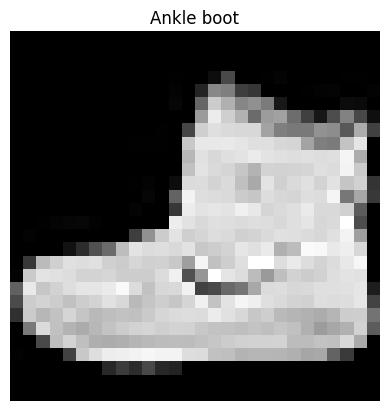

In [7]:
## Lets' visualize the data
image, label = train_data[0]
print(f"Image shape: {image.shape}")
plt.imshow(X=image.squeeze(),cmap="gray")
plt.title(class_names[label])
plt.axis(False)

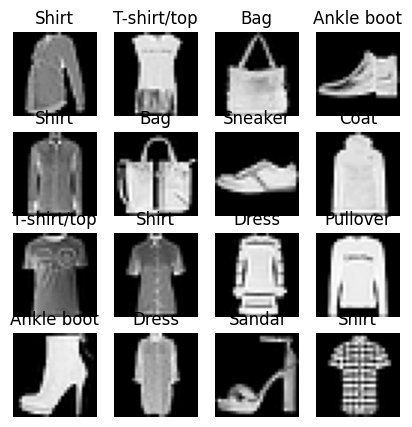

In [8]:
## lets see few more examples

fig =plt.figure(figsize=(5,5))
rows, cols = 4, 4
for i in range(1, rows*cols+1):
    random_idx = torch.randint(0, len(train_data), size=[1]).item()
    image, label = train_data[random_idx]
    fig.add_subplot(rows,cols, i)
    plt.imshow(X=image.squeeze(),cmap="gray")
    plt.title(class_names[label])
    plt.axis(False)
    

Prepare Dataloader to iterate through the images. Pytorch Dataloader does the magic to convert these into smaller chunks called batches

In [9]:
from torch.utils.data import DataLoader

# Setup the batch size hyperparameter
BATCH_SIZE =32

# Turn dataset into iterable (batches)

train_dataloader = DataLoader(train_data, 
                              batch_size=BATCH_SIZE,
                              shuffle=True)

test_dataloader = DataLoader(test_data, 
                              batch_size=BATCH_SIZE,
                              shuffle=False)

print(f"Dataloaders: {train_dataloader, test_dataloader}") 
print(f"Length of train dataloader: {len(train_dataloader)} batches of {BATCH_SIZE}")
print(f"Length of test dataloader: {len(test_dataloader)} batches of {BATCH_SIZE}")

Dataloaders: (<torch.utils.data.dataloader.DataLoader object at 0x000001840811A980>, <torch.utils.data.dataloader.DataLoader object at 0x000001840811ACB0>)
Length of train dataloader: 1875 batches of 32
Length of test dataloader: 313 batches of 32


In [10]:
train_features_batch, train_labels_batch = next(iter(train_dataloader))

In [11]:
for a,(b,c) in enumerate(train_dataloader):
    if a%100 ==0:
        print(a,b[0,0,0,0].item(),len(c))
        #print(b)
#plt.imshow(X=image1,cmap="gray")


0 0.0 32
100 0.0 32
200 0.0 32
300 0.0 32
400 0.0 32
500 0.0 32
600 0.0 32
700 0.0 32
800 0.0 32
900 0.0 32
1000 0.0 32
1100 0.0 32
1200 0.0 32
1300 0.0 32
1400 0.0 32
1500 0.0 32
1600 0.0 32
1700 0.0 32
1800 0.0 32


In [12]:
from torch import nn
class FashionMNISTModelV0(nn.Module):
    def __init__(self,input_shape: int, hidden_units: int, output_shape:int):
        super().__init__()
        self.layer_stack = nn.Sequential(
            nn.Flatten(), # neural networks like their inputs in vector form instead of matrix
            nn.Linear(in_features=input_shape, out_features=hidden_units),
            nn.Linear(in_features=hidden_units, out_features=output_shape)
            )
    
    def forward(self, x):
        return self.layer_stack(x)


In [13]:
flatten_model = nn.Flatten(start_dim=1)

x= train_features_batch

print(x.shape)

x_flatten=flatten_model(x)

print(x_flatten[0])

torch.Size([32, 1, 28, 28])
tensor([0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0157, 0.3176, 0.7294, 0.6667, 0.6471, 0.6784, 0.7137, 0.7176, 0.3569,
        0.0157, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.1804,
        0.4235, 0.5137, 0.3922, 0.5412, 0.8039, 1.0000, 1.0000, 0.8392, 0.6627,
        0.4353, 0.5294, 0.4510, 0.1804, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.3020, 0.4980,
        0.4980, 0.4196, 0.3451, 0.3451, 0.2510, 0.2314, 0.3569, 0.3176, 0.2000,
        0.2353, 0.3412, 0.3490, 0.4196, 0.4980, 0.5020, 0.2941, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.2039, 0.5412,
        0.3569, 0.3451, 0.3137, 0.3451, 0.3333, 0.3333, 0.3098, 0.2549, 0.2392,
        0.3137, 0.3333, 0.3569, 0.3647, 0.3412, 0.3333, 0.3765, 0.4549, 0.2157,
        0.00

In [14]:
torch.manual_seed(42)

## Create Model 0 instance with the required features for input and output

model_0=FashionMNISTModelV0(input_shape=784,
                            hidden_units=10,
                            output_shape=10)


In [15]:
## Import the accuracy function, setup a loss function and optimizer

from helper_functions import accuracy_fn

loss_fn= nn.CrossEntropyLoss() ## Loss function for Multiclass classification
optimizer = torch.optim.SGD(params=model_0.parameters(), lr=0.1)

In [16]:
## Setup a timer function to calculate the time for training

from timeit import default_timer as timer

def print_train_time(start: float, end:float, device: torch.device = None):
    total_time = end -start
    print("Train time on {device}: {total_time:.3f} seconds")
    return total_time

In [17]:
## Create a training loop and testing loop for the data in batches

## Import tqdm for auto progress bar
#from tqdm.auto import tqdm

# Set the seed and the timer

torch.manual_seed(42)
train_start_time= timer()


In [18]:
## Create training and testing loop

from tqdm.auto import tqdm
epochs =3

for epoch in tqdm(range(epochs)):
    print(f"Epoch: {epoch}\n")
    train_loss =0

    ## Add a loop for the batches in training data
    for batch, (X,y) in enumerate(train_dataloader):
        model_0.train()
        print(X.shape, y.shape)
        ## Forward pass
        y_pred =model_0.forward(X)
        print(y_pred.shape)

        ## Calculate the loss (per batch)
        loss = loss_fn(y_pred, y)
        train_loss += loss

        ## Optimizer to Zero grad to reset the parameters
        optimizer.zero_grad()

        ## Backward propagation of loss calculation
        loss.backward()

        ## Gradient descent using optimizer step
        optimizer.step()

        ## Print out the number of samples we have seen
        if batch % 400 ==0:
            #print(batch, len(X), len(train_dataloader.dataset))
            print(f"Looked at {(batch * len(X)/len(train_dataloader.dataset))*100} Percentage")

    # Divide total train loss by length of train dataloader (average loss per batch per epoch)
    print(len(train_dataloader))
    train_loss /= len(train_dataloader) 

    ## Testing Loop
    ## setup variables for testing loss and testing accuracy
    test_loss =0
    test_acc =0

    ## Testing 
    model_0.eval()
    with torch.inference_mode():
        for X, y in test_dataloader:
            ## 1 forward pass
            test_pred = model_0.forward(X)

            ## calculate the testing loss
            test_loss += loss_fn(test_pred, y)

            ## calculate the accuracy
            test_acc += accuracy_fn(y_true=y, y_pred=test_pred.argmax(dim=1))

        # Calculations on test metrics need to happen inside torch.inference_mode()
        # Divide total test loss by length of test dataloader (per batch)
        test_loss /= len(test_dataloader)

        # Divide total accuracy by length of test dataloader (per batch)
        test_acc /= len(test_dataloader)

    ## Print out what's happening
    print(f"\nTrain loss: {train_loss:.5f} | Test loss: {test_loss:.5f}, Test acc: {test_acc:.2f}%\n")

train_time_end= timer()
total_train_time_model_0 = print_train_time(start=train_start_time, 
                                           end=train_time_end,
                                           device=str(next(model_0.parameters()).device))

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0

torch.Size([32, 1, 28, 28]) torch.Size([32])
torch.Size([32, 10])
Looked at 0.0 Percentage
torch.Size([32, 1, 28, 28]) torch.Size([32])
torch.Size([32, 10])
torch.Size([32, 1, 28, 28]) torch.Size([32])
torch.Size([32, 10])
torch.Size([32, 1, 28, 28]) torch.Size([32])
torch.Size([32, 10])
torch.Size([32, 1, 28, 28]) torch.Size([32])
torch.Size([32, 10])
torch.Size([32, 1, 28, 28]) torch.Size([32])
torch.Size([32, 10])
torch.Size([32, 1, 28, 28]) torch.Size([32])
torch.Size([32, 10])
torch.Size([32, 1, 28, 28]) torch.Size([32])
torch.Size([32, 10])
torch.Size([32, 1, 28, 28]) torch.Size([32])
torch.Size([32, 10])
torch.Size([32, 1, 28, 28]) torch.Size([32])
torch.Size([32, 10])
torch.Size([32, 1, 28, 28]) torch.Size([32])
torch.Size([32, 10])
torch.Size([32, 1, 28, 28]) torch.Size([32])
torch.Size([32, 10])
torch.Size([32, 1, 28, 28]) torch.Size([32])
torch.Size([32, 10])
torch.Size([32, 1, 28, 28]) torch.Size([32])
torch.Size([32, 10])
torch.Size([32, 1, 28, 28]) torch.Size([3

 33%|███▎      | 1/3 [00:17<00:35, 17.92s/it]


Train loss: 0.59039 | Test loss: 0.50954, Test acc: 82.04%

Epoch: 1

torch.Size([32, 1, 28, 28]) torch.Size([32])
torch.Size([32, 10])
Looked at 0.0 Percentage
torch.Size([32, 1, 28, 28]) torch.Size([32])
torch.Size([32, 10])
torch.Size([32, 1, 28, 28]) torch.Size([32])
torch.Size([32, 10])
torch.Size([32, 1, 28, 28]) torch.Size([32])
torch.Size([32, 10])
torch.Size([32, 1, 28, 28]) torch.Size([32])
torch.Size([32, 10])
torch.Size([32, 1, 28, 28]) torch.Size([32])
torch.Size([32, 10])
torch.Size([32, 1, 28, 28]) torch.Size([32])
torch.Size([32, 10])
torch.Size([32, 1, 28, 28]) torch.Size([32])
torch.Size([32, 10])
torch.Size([32, 1, 28, 28]) torch.Size([32])
torch.Size([32, 10])
torch.Size([32, 1, 28, 28]) torch.Size([32])
torch.Size([32, 10])
torch.Size([32, 1, 28, 28]) torch.Size([32])
torch.Size([32, 10])
torch.Size([32, 1, 28, 28]) torch.Size([32])
torch.Size([32, 10])
torch.Size([32, 1, 28, 28]) torch.Size([32])
torch.Size([32, 10])
torch.Size([32, 1, 28, 28]) torch.Size([32])
t

 67%|██████▋   | 2/3 [00:35<00:17, 17.50s/it]


Train loss: 0.47633 | Test loss: 0.47989, Test acc: 83.20%

Epoch: 2

torch.Size([32, 1, 28, 28]) torch.Size([32])
torch.Size([32, 10])
Looked at 0.0 Percentage
torch.Size([32, 1, 28, 28]) torch.Size([32])
torch.Size([32, 10])
torch.Size([32, 1, 28, 28]) torch.Size([32])
torch.Size([32, 10])
torch.Size([32, 1, 28, 28]) torch.Size([32])
torch.Size([32, 10])
torch.Size([32, 1, 28, 28]) torch.Size([32])
torch.Size([32, 10])
torch.Size([32, 1, 28, 28]) torch.Size([32])
torch.Size([32, 10])
torch.Size([32, 1, 28, 28]) torch.Size([32])
torch.Size([32, 10])
torch.Size([32, 1, 28, 28]) torch.Size([32])
torch.Size([32, 10])
torch.Size([32, 1, 28, 28]) torch.Size([32])
torch.Size([32, 10])
torch.Size([32, 1, 28, 28]) torch.Size([32])
torch.Size([32, 10])
torch.Size([32, 1, 28, 28]) torch.Size([32])
torch.Size([32, 10])
torch.Size([32, 1, 28, 28]) torch.Size([32])
torch.Size([32, 10])
torch.Size([32, 1, 28, 28]) torch.Size([32])
torch.Size([32, 10])
torch.Size([32, 1, 28, 28]) torch.Size([32])
t

100%|██████████| 3/3 [00:53<00:00, 17.78s/it]


Train loss: 0.45503 | Test loss: 0.47664, Test acc: 83.43%

Train time on {device}: {total_time:.3f} seconds


In [19]:
device = "GPU" if torch.cuda.is_available() else "cpu"
device

'cpu'

In [20]:
## Create a new Model with some Non Linearity function

class FashionMNISTModelV1(nn.Module):
    def __init__(self, input_shape:int, hidden_units:int, output_shape:int):
        super().__init__()
        self.layer_stack = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=input_shape,out_features=hidden_units),
            nn.ReLU(),
            nn.Linear(in_features=hidden_units,out_features=output_shape),
            nn.ReLU()
        )

    def forward(self,x):
        return self.layer_stack(x)


In [21]:
## Create a version of the new Model and push the model to device

torch.manual_seed(42)
model_1=FashionMNISTModelV1(input_shape=784,
                            hidden_units=10,
                            output_shape=10).to(device=device)

print(next(model_1.parameters()))

Parameter containing:
tensor([[ 0.0273,  0.0296, -0.0084,  ..., -0.0142,  0.0093,  0.0135],
        [-0.0188, -0.0354,  0.0187,  ..., -0.0106, -0.0001,  0.0115],
        [-0.0008,  0.0017,  0.0045,  ..., -0.0127, -0.0188,  0.0059],
        ...,
        [-0.0116,  0.0273, -0.0344,  ...,  0.0176,  0.0283, -0.0011],
        [-0.0230,  0.0257,  0.0291,  ..., -0.0187, -0.0087,  0.0001],
        [ 0.0176, -0.0147,  0.0053,  ..., -0.0336, -0.0221,  0.0205]],
       requires_grad=True)


In [22]:
### Create a Loss function and Optimizer for the new Model

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model_1.parameters(), lr=0.1)

In [23]:
### Creating a function for training loop and testing loop

def train_step(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn : torch.nn.Module,
               optimizer: torch.optim.Optimizer,
               accuracy_fn):
    ## Create a accumulator for storing the loss of all the batches
    train_loss = 0
    train_acc =0

    ## Put the Model in training Mode
    model.train()

    ## Create a loop to pass through the batches in the dataloader
    for batch,(X,y) in enumerate(data_loader):

        ## Put the data into target device

        X,y = X.to(device=device), y.to(device=device)
        ## Forward function
        y_pred = model.forward(X)

        #print(y_pred.shape)
        #print(y.shape)

        ## Calculate the loss and accuracy
        loss = loss_fn(y_pred, y)
        train_loss += loss

        train_acc += accuracy_fn(y_true=y, y_pred= y_pred.argmax(dim=1))

        ## Optimizer Zero Gradient
        optimizer.zero_grad()

        ## Backward propagation of loss
        loss.backward()

        ## Gradient descent step to adjust the parameters to reduce the gradient
        optimizer.step()
    
    ## Cacluate the average loss per batch
    train_loss = train_loss/len(data_loader)
    train_acc = train_acc/len(data_loader)

    print(f"Train Loss: {train_loss:.5f}  | Train accuracy: {train_acc:.4f}%")


In [24]:

## Create a testing loop for the model
def test_step(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn : torch.nn.Module,
               accuracy_fn):
    ## Create a accumulator for storing the loss
    test_loss = 0
    test_acc =0

    ## Put the Model in training Mode
    model.eval()

    ## Create a loop to pass through the data in the dataloader
    with torch.inference_mode():
        for (X,y) in data_loader:

        ## Put the data into target device
            X,y = X.to(device=device), y.to(device=device)
        
        ## Forward function
            test_pred = model.forward(X)

        ## Calculate the loss and accuracy
            loss = loss_fn(test_pred, y)
            test_loss += loss

            test_acc += accuracy_fn(y_true=y, y_pred= test_pred.argmax(dim=1))

    ## Cacluate the average loss per batch
        test_loss = test_loss/len(data_loader)
        test_acc = test_acc/len(data_loader)

    print(f"Test Loss: {test_loss:.5f}  | Test accuracy: {test_acc:.4f}%")


In [25]:
torch.manual_seed(42)
from timeit import default_timer as timer

train_start_time_model1 = timer()

epochs =3 


for epoch in tqdm(range(epochs)):
    print(f" epoch :{epoch}\n-----")

    ## Call the Trainging function for training the model
    train_step(model =model_1,
               data_loader=train_dataloader,
               optimizer=optimizer,
               loss_fn=loss_fn,
               accuracy_fn=accuracy_fn)
    
    ## Call the Testinng function for testing the model
    test_step(model=model_1,
              data_loader=test_dataloader,
              loss_fn=loss_fn,
              accuracy_fn=accuracy_fn)

train_end_time_model1 = timer()

total_train_time_model_1= print_train_time(start=train_start_time_model1,
                                           end=train_end_time_model1,
                                           device=device)

  0%|          | 0/3 [00:00<?, ?it/s]

 epoch :0
-----
Train Loss: 1.09199  | Train accuracy: 61.3433%


 33%|███▎      | 1/3 [00:17<00:34, 17.33s/it]

Test Loss: 0.95636  | Test accuracy: 64.9960%
 epoch :1
-----
Train Loss: 0.78101  | Train accuracy: 71.9283%


 67%|██████▋   | 2/3 [00:34<00:17, 17.32s/it]

Test Loss: 0.72227  | Test accuracy: 73.9117%
 epoch :2
-----
Train Loss: 0.67027  | Train accuracy: 75.9367%


100%|██████████| 3/3 [00:51<00:00, 17.19s/it]

Test Loss: 0.68500  | Test accuracy: 75.0200%
Train time on {device}: {total_time:.3f} seconds


In [26]:
torch.manual_seed(42)
def eval_model(model: torch.nn.Module, 
               data_loader: torch.utils.data.DataLoader, 
               loss_fn: torch.nn.Module, 
               accuracy_fn):
    """Returns a dictionary containing the results of model predicting on data_loader.

    Args:
        model (torch.nn.Module): A PyTorch model capable of making predictions on data_loader.
        data_loader (torch.utils.data.DataLoader): The target dataset to predict on.
        loss_fn (torch.nn.Module): The loss function of model.
        accuracy_fn: An accuracy function to compare the models predictions to the truth labels.

    Returns:
        (dict): Results of model making predictions on data_loader.
    """
    loss, acc = 0, 0
    model.eval()
    with torch.inference_mode():
        for X, y in data_loader:
            # Make predictions with the model
            y_pred = model(X)
            
            # Accumulate the loss and accuracy values per batch
            loss += loss_fn(y_pred, y)
            acc += accuracy_fn(y_true=y, 
                                y_pred=y_pred.argmax(dim=1)) # For accuracy, need the prediction labels (logits -> pred_prob -> pred_labels)
        
        # Scale loss and acc to find the average loss/acc per batch
        loss /= len(data_loader)
        acc /= len(data_loader)
        
    return {"model_name": model.__class__.__name__, # only works when model was created with a class
            "model_loss": loss.item(),
            "model_acc": acc}


In [27]:
class FashionMNISTModelV2(nn.Module):
    """
    Model architecture copying TinyVGG from: 
    https://poloclub.github.io/cnn-explainer/
    """
    def __init__(self, input_shape:int, hidden_units:int, output_shape:int):
        super().__init__()
        self.conv2d_1 = nn.Sequential(
            nn.Conv2d(in_channels = input_shape,
                      out_channels=hidden_units,
                      kernel_size=3,
                      stride=1,
                      padding=1),
            nn.ReLU(),
            nn.Conv2d(in_channels = hidden_units,
                      out_channels=hidden_units,
                      kernel_size=3,
                      stride=1,
                      padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2)
        )
        self.conv2d_2 = nn.Sequential(
            nn.Conv2d(in_channels=hidden_units,
            out_channels=hidden_units,
            kernel_size=3,
            stride=1,
            padding=1),
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_units,out_channels=hidden_units,kernel_size=3,stride=1,padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2,stride=2)
        )
        self.classifier= nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=hidden_units*7*7,
                      out_features=output_shape)
        )
    
    def forward(self,x):
        x= self.conv2d_1(x)
        #print(x.shape)
        x = self.conv2d_2(x)
        #print(x.shape)
        x = self.classifier(x)
        #print(x.shape)
        return x

In [28]:
model_2=FashionMNISTModelV2(input_shape = 1,
                            hidden_units=10,
                            output_shape=len(class_names))

model_2

FashionMNISTModelV2(
  (conv2d_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv2d_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

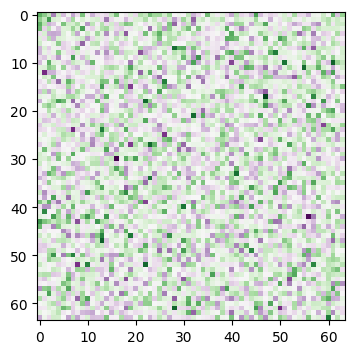

In [29]:
torch.manual_seed(42)
images=torch.randn(size=(32,3,64,64))
image = images[0]
plt.figure(figsize=(4,4))
plt.imshow(image[0], cmap='PRGn')

In [30]:
conv_2d= nn.Conv2d(in_channels=3,
                   out_channels=10,
                   kernel_size=3,
                   padding=0,
                   stride=1)

conv2d_output= conv_2d(image)
print(f" Shape of the original image:\n {image.shape}")
print(f" Shape of the imgae after convultion layer: \n {conv2d_output.shape}")

max_pool2d= nn.MaxPool2d(kernel_size=3)

max_pool2d_out = max_pool2d(conv2d_output)

print(f" Shape of the original image:\n {image.shape}")
print(f" Shape of the imgae after convultion layer and Maxpool 2d: \n {max_pool2d_out.shape}")

 Shape of the original image:
 torch.Size([3, 64, 64])
 Shape of the imgae after convultion layer: 
 torch.Size([10, 62, 62])
 Shape of the original image:
 torch.Size([3, 64, 64])
 Shape of the imgae after convultion layer and Maxpool 2d: 
 torch.Size([10, 20, 20])


In [31]:
## Setup a Loss function and Optimizer for the Mode12 - CNN

loss_fn = nn.CrossEntropyLoss()

optimizer = torch.optim.SGD(params=model_2.parameters(),lr=0.1)

In [32]:
torch.manual_seed(42)

start_time_model2 = timer()

epochs =3

for epoch in tqdm(range(epochs)):
    print(f" epoch: {epoch} \n----------")

    train_step(model=model_2,
               data_loader=train_dataloader,
               loss_fn=loss_fn,
               optimizer=optimizer,
               accuracy_fn=accuracy_fn)
    
    test_step(model=model_2,
              data_loader=test_dataloader,
              loss_fn=loss_fn,
              accuracy_fn=accuracy_fn)
    
end_time_model2= timer()

total_train_time_model_2= print_train_time(start=start_time_model2,end=end_time_model2)

  0%|          | 0/3 [00:00<?, ?it/s]

 epoch: 0 
----------
Train Loss: 0.59190  | Train accuracy: 78.5383%


 33%|███▎      | 1/3 [01:14<02:28, 74.30s/it]

Test Loss: 0.39047  | Test accuracy: 86.0523%
 epoch: 1 
----------
Train Loss: 0.36174  | Train accuracy: 87.0700%


 67%|██████▋   | 2/3 [02:41<01:22, 82.15s/it]

Test Loss: 0.35067  | Test accuracy: 87.1006%
 epoch: 2 
----------
Train Loss: 0.32421  | Train accuracy: 88.1783%


100%|██████████| 3/3 [04:02<00:00, 80.71s/it]

Test Loss: 0.31687  | Test accuracy: 88.4285%
Train time on {device}: {total_time:.3f} seconds


In [33]:
model0_results= eval_model(model=model_0,data_loader=test_dataloader,loss_fn=loss_fn,accuracy_fn=accuracy_fn)
model1_results= eval_model(model=model_1,data_loader=test_dataloader,loss_fn=loss_fn,accuracy_fn=accuracy_fn)
model2_results= eval_model(model=model_2,data_loader=test_dataloader,loss_fn=loss_fn,accuracy_fn=accuracy_fn)


In [34]:
import pandas as pd
compare_results = pd.DataFrame([model0_results,model1_results,model2_results])
compare_results

,model_name,model_loss,model_acc
0,FashionMNISTModelV0,0.476639,83.426518
1,FashionMNISTModelV1,0.685001,75.019968
2,FashionMNISTModelV2,0.316868,88.428514


In [35]:
## Make and evaluate predictions of the best Model

def make_predictions(model:torch.nn.Module, data:list):
    pred_probs =[]
    model.eval()
    with torch.inference_mode():
        ## Prepare a sample of records
        for sample in data:
            ## calculate the logits
            #print(sample.shape)
            sample = torch.unsqueeze(sample, dim=0)
            #print(sample.shape)
            pred_logit = model.forward(sample)

            ## convert the pred logits to pred probabilty
            pred_prob = torch.softmax(pred_logit.squeeze(),dim=0)

            ## append the pred_prob to the list
            pred_probs.append(pred_prob)

    ## stack the pred probs to convert the list to a tensor
    return torch.stack(pred_probs) 

In [36]:
import random
random.seed(42)

test_samples =[]
test_labels = []
for sample, label in random.sample(list(test_data),k=9):
    test_samples.append(sample)
    test_labels.append(label)



In [37]:
pred_probs = make_predictions(model=model_2,data=test_samples)

pred_classes = torch.argmax(pred_probs,dim=1)

pred_classes, test_labels

(tensor([5, 1, 7, 4, 3, 0, 4, 7, 1]), [5, 1, 7, 4, 3, 0, 4, 7, 1])

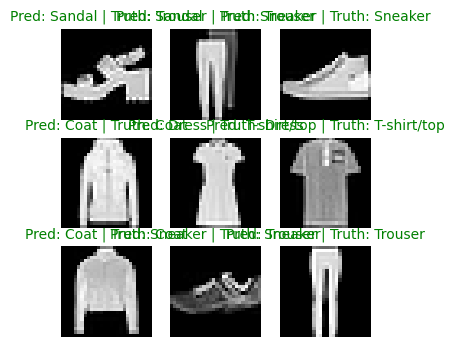

In [38]:
## Plot the preditions and visualize

plt.figure(figsize=(4,4))
nrows =3
ncols =3
for i,sample in enumerate(test_samples):
    ## Create a subplt
    plt.subplot(nrows, ncols, i+1)
    
    # plot the sample image
    #print(sample)
    plt.imshow(sample.squeeze(), cmap="gray")
    
    # Find the prediction label (in text form, e.g. "Sandal")
    pred_label = class_names[pred_classes[i]]

    # Get the truth label (in text form, e.g. "T-shirt")
    truth_label = class_names[test_labels[i]] 

    # Create the title text of the plot
    title_text = f"Pred: {pred_label} | Truth: {truth_label}"
  
    # Check for equality and change title colour accordingly
    if pred_label == truth_label:
          plt.title(title_text, fontsize=10, c="g") # green text if correct
    else:
          plt.title(title_text, fontsize=10, c="r") # red text if wrong
    plt.axis(False)

In [41]:
from pathlib import Path

MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

Model_name = "04_neural_network_image_classification.pth"

MODEL_SAVE_PATH = MODEL_PATH/Model_name

print(f"Saving the Model results to the Model path {MODEL_SAVE_PATH}")

torch.save(obj=model_2.state_dict(),f=MODEL_SAVE_PATH)

Saving the Model results to the Model path models\04_neural_network_image_classification.pth


In [43]:
## Load the model using the saved state dictionary and evaluate the model results

loaded_model_v2= FashionMNISTModelV2(
    input_shape=1,
    hidden_units=10,
    output_shape=len(class_names)
)

loaded_model_v2

FashionMNISTModelV2(
  (conv2d_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv2d_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

In [44]:
## Loaded the saved state dictionary

loaded_model_v2.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

<All keys matched successfully>

In [45]:
torch.manual_seed(42)

loaded_model_v2_results = eval_model(
    model = loaded_model_v2,
    data_loader=test_dataloader,
    loss_fn=loss_fn,
    accuracy_fn=accuracy_fn
)

loaded_model_v2_results

{'model_name': 'FashionMNISTModelV2',
 'model_loss': 0.31686753034591675,
 'model_acc': 88.4285143769968}